<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/Data_Analysis_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_exo2.csv')

Done


In [ ]:
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [ ]:
from collections import Counter
count=Counter()
for genre in df['genres']:
    count.update([genre])
count.most_common(15)

[('21st century classical', 1),
 ('432hz', 1),
 ('8-bit', 1),
 ('[]', 1),
 ('a cappella', 1),
 ('abstract', 1),
 ('abstract beats', 1),
 ('abstract hip hop', 1),
 ('accordeon', 1),
 ('accordion', 1),
 ('acid house', 1),
 ('acid rock', 1),
 ('acid trance', 1),
 ('acousmatic', 1),
 ('acoustic blues', 1)]

# Feature analysis according to popularity

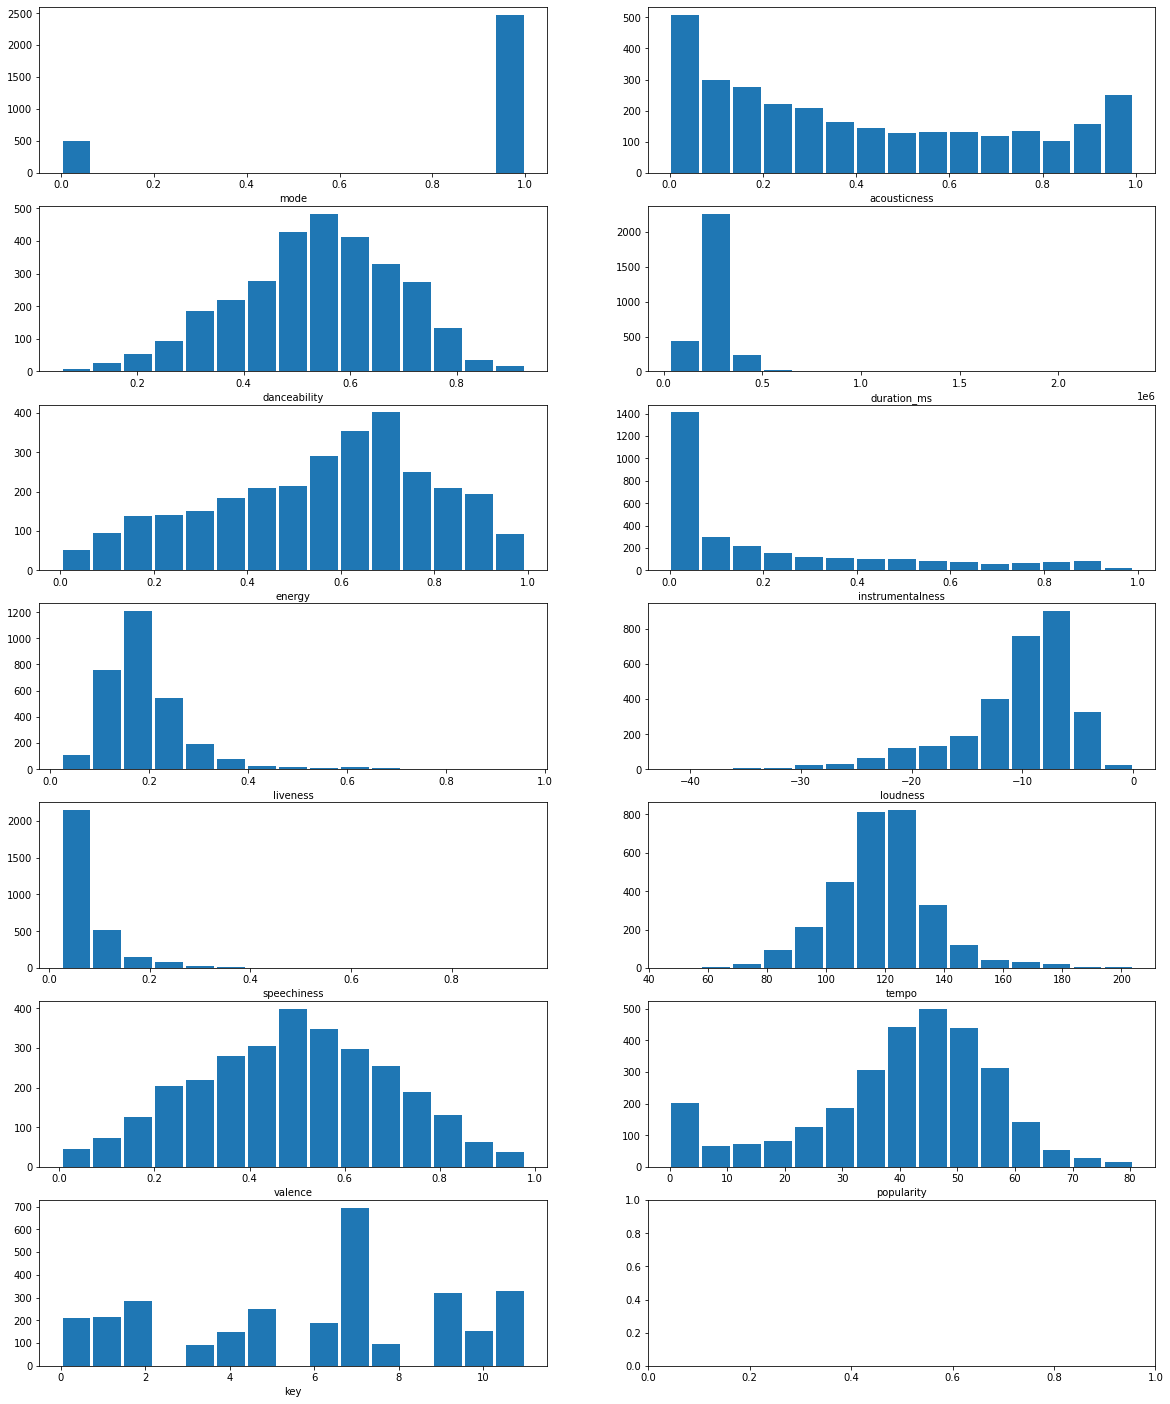

In [ ]:
dataset=df.drop(['genres'],axis=1)

_,axs=plt.subplots(ncols=2,nrows=7,figsize=(20,25))
for i,ax in enumerate(axs.flatten()):
    if i<13:
        plt.sca(ax)
        plt.hist(dataset.iloc[:,i],rwidth=0.9,bins=15)
        plt.xlabel(dataset.columns[i])
plt.show()

## Correlation between popularity and discrete features

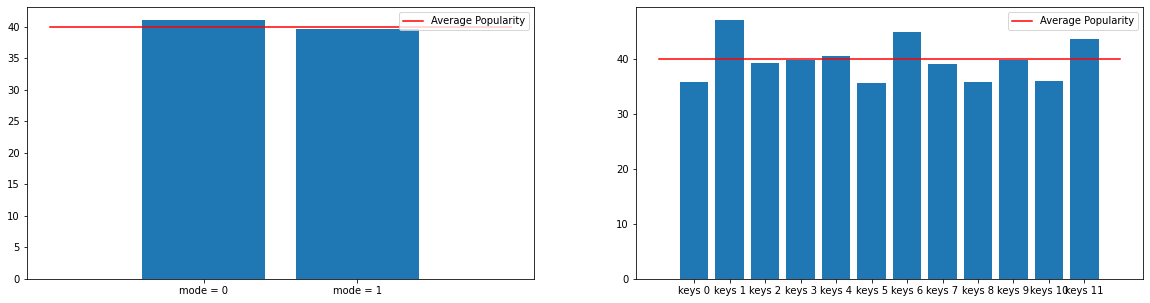

In [ ]:
cols=['mode','key']
avg=dataset['popularity'].mean()

_,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.sca(ax1)
plt.bar([0,1],[ dataset[ dataset['mode']== i ]['popularity'].mean() for i in range(2)])
plt.plot([-1,2],[avg,avg],label='Average Popularity',color='red')
plt.xticks([0,1],labels=["mode = 0","mode = 1"])
plt.legend(loc='upper right')

plt.sca(ax2)
plt.bar(range(12),[ dataset[ dataset['key']== i ]['popularity'].mean() for i in range(12)])
plt.xticks(range(12),labels=['keys '+str(k) for k in range(12)])
plt.plot([-1,12],[avg,avg],label='Average Popularity',color='red')
plt.legend(loc='upper right')

plt.show()

In [ ]:
dataset[dataset['mode']==1]

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,1,0.285011,0.359500,4.135265e+05,0.671500,0.019811,0.154200,-6.864500,0.042800,131.825000,0.309500,29.500000,7
2966,1,0.434976,0.574426,2.513377e+05,0.527515,0.004562,0.137687,-6.746653,0.034451,165.377817,0.556663,52.460396,6
2968,1,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2970,1,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5


## Correlation between popularity and continuous features

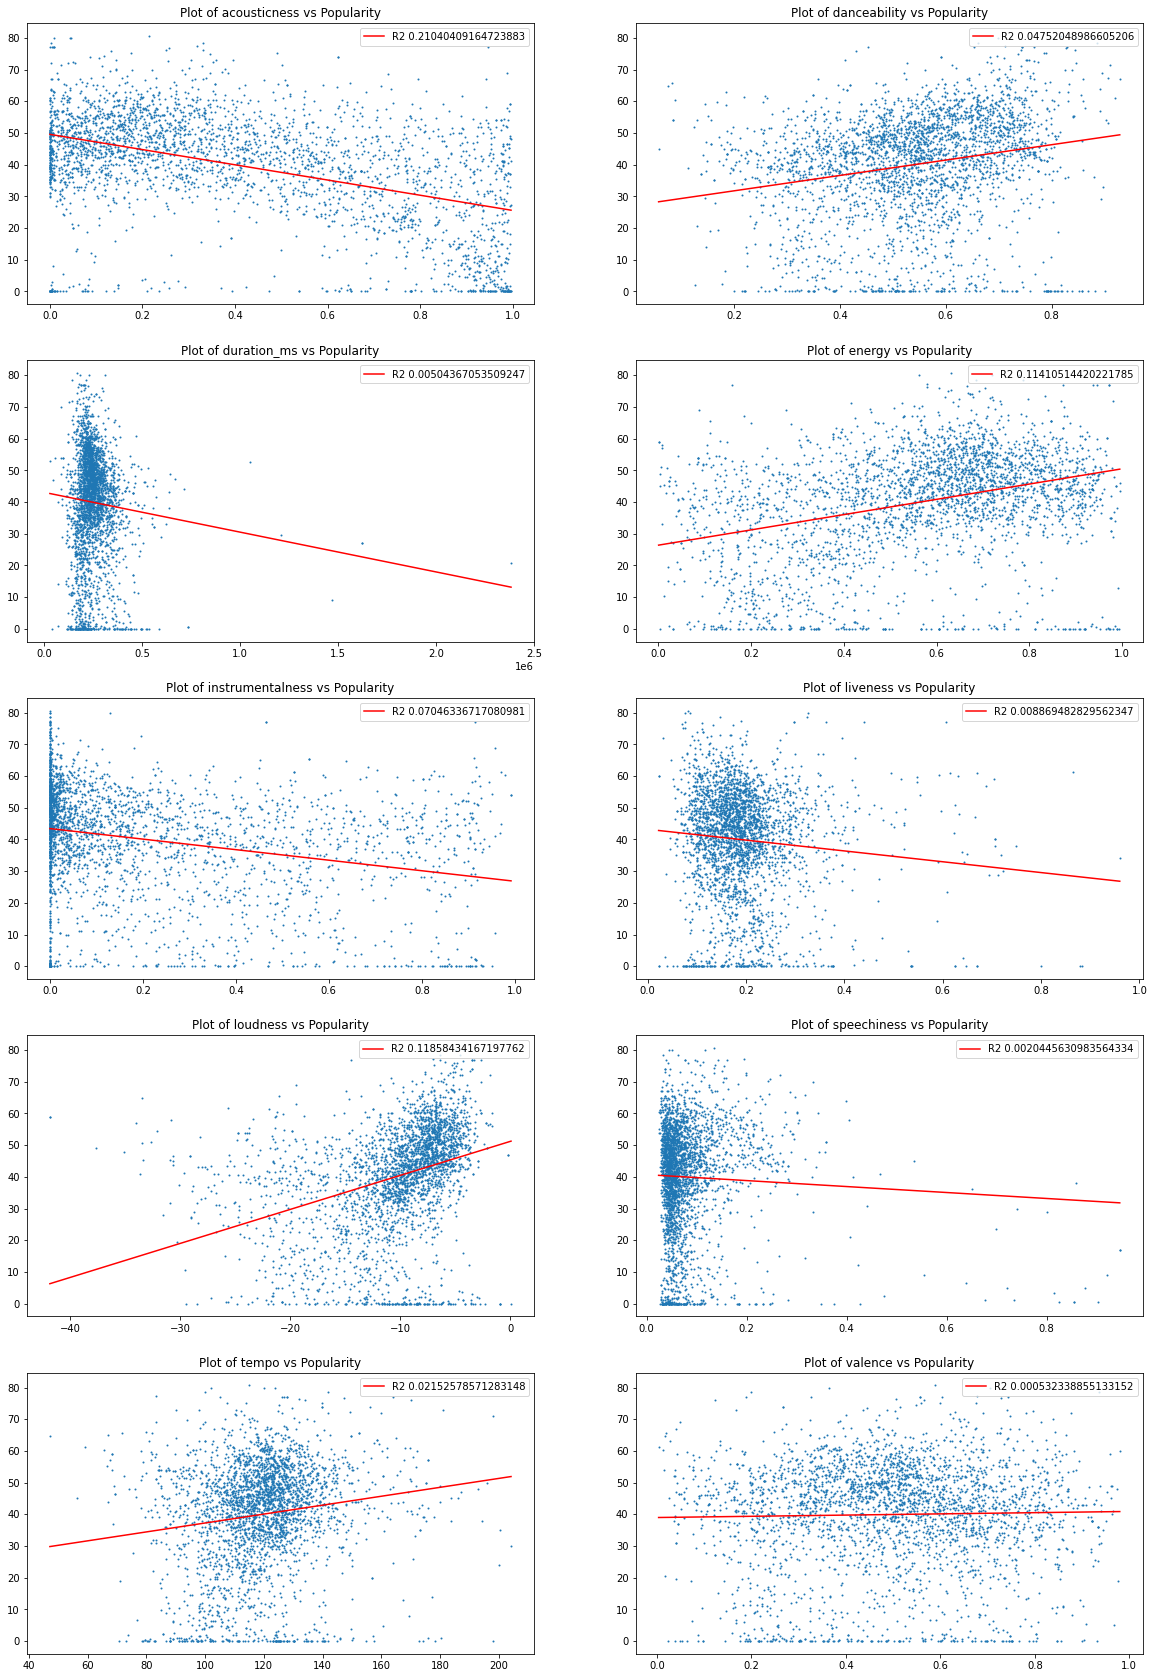

In [ ]:
from sklearn.metrics import r2_score

cols=['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

_,(axs)=plt.subplots(nrows=5,ncols=2,figsize=(20,30))

for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.scatter(dataset[cols[i]],dataset['popularity'],s=1)
    
    #Linear regression
    cov_mat=np.cov(dataset[cols[i]],dataset['popularity'])
    b1hat=cov_mat[0,1]/cov_mat[0,0]
    b0hat=dataset['popularity'].mean()-b1hat*dataset[cols[i]].mean()

    ypred=b1hat*dataset[cols[i]].to_numpy()+b0hat

    r2=r2_score(dataset['popularity'].to_numpy(),b1hat*dataset[cols[i]].to_numpy()+b0hat)

    plt.plot([dataset[cols[i]].min(),dataset[cols[i]].max()],
             [b1hat*dataset[cols[i]].min()+b0hat,b1hat*dataset[cols[i]].max()+b0hat],
             color='red',label='R2 '+str(r2))
    
    plt.legend(loc='upper right')
    plt.title("Plot of "+str(cols[i])+" vs Popularity")

plt.show()

## Correlation Matrix

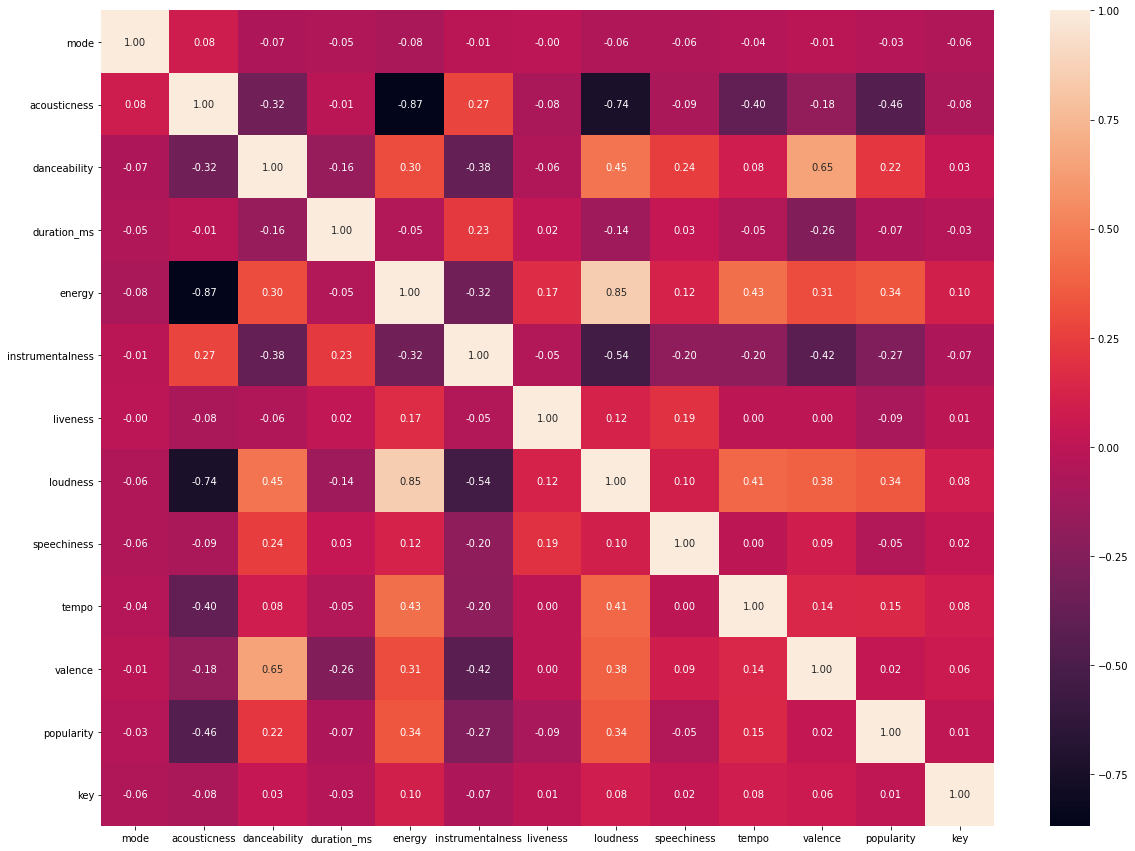

In [ ]:
import seaborn as sn
df_corr=dataset.corr()
plt.figure(figsize=(20,15))
sn.heatmap(df_corr,annot=True,fmt='.2f')
plt.show()

# How to handle genres ?

## Delete the feature

In [ ]:
X=df.drop(['genres','popularity'],axis=1).to_numpy()
Y=df['popularity'].to_numpy()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2378, 12) (2378,) (595, 12) (595,)


## Word Analysis

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts=df['genres']

tokenizer=Tokenizer(lower='True')
tokenizer.fit_on_texts(texts)
words=np.array(Counter(tokenizer.word_counts).most_common(30))
words

array([['pop', '252'],
       ['indie', '238'],
       ['rock', '200'],
       ['metal', '135'],
       ['classical', '107'],
       ['hop', '103'],
       ['hip', '102'],
       ['jazz', '98'],
       ['folk', '83'],
       ['punk', '79'],
       ['rap', '66'],
       ['deep', '56'],
       ['classic', '54'],
       ['house', '53'],
       ['piano', '43'],
       ['post', '41'],
       ['japanese', '40'],
       ['swedish', '40'],
       ['blues', '38'],
       ['canadian', '38'],
       ['new', '37'],
       ['modern', '36'],
       ['italian', '36'],
       ['alternative', '34'],
       ['country', '33'],
       ['australian', '33'],
       ['soul', '32'],
       ['hardcore', '32'],
       ['musica', '32'],
       ['german', '31']], dtype='<U11')

What is their popularity ?

In [ ]:
df[df['genres'].str.contains('pop')]

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
15,1,acoustic pop,0.490235,0.535108,235379.783555,0.476440,0.033338,0.157750,-9.297248,0.041771,117.887420,0.379415,53.115505,7
22,1,afghan pop,0.410629,0.651714,326503.928571,0.651571,0.000911,0.087461,-9.152179,0.084414,113.594714,0.784107,39.321429,7
36,1,afropop,0.436660,0.625803,309968.975271,0.534525,0.151396,0.159884,-11.091499,0.077085,116.542459,0.648471,41.380341,7
43,0,albanian pop,0.002870,0.683000,187106.000000,0.665000,0.000000,0.083900,-8.405000,0.049900,127.968000,0.667000,42.000000,8
57,1,alternative pop,0.110068,0.455066,221230.530965,0.759271,0.214616,0.172595,-8.791657,0.050904,128.573919,0.547558,37.637098,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,1,vintage italian pop,0.967937,0.465675,188611.777719,0.253254,0.227783,0.208525,-14.556093,0.079295,107.430005,0.526151,4.711601,0
2888,1,vintage spanish pop,0.767643,0.518357,174425.535714,0.576464,0.064063,0.374500,-10.186536,0.101464,111.531429,0.693607,0.000000,7
2889,1,vintage swedish pop,0.738509,0.445879,166907.818182,0.355838,0.136349,0.212067,-14.918818,0.052358,101.546515,0.551485,19.439394,10
2896,1,viral pop,0.411967,0.575520,215403.928662,0.540225,0.012602,0.148412,-7.187741,0.059686,121.108539,0.427711,59.811946,7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


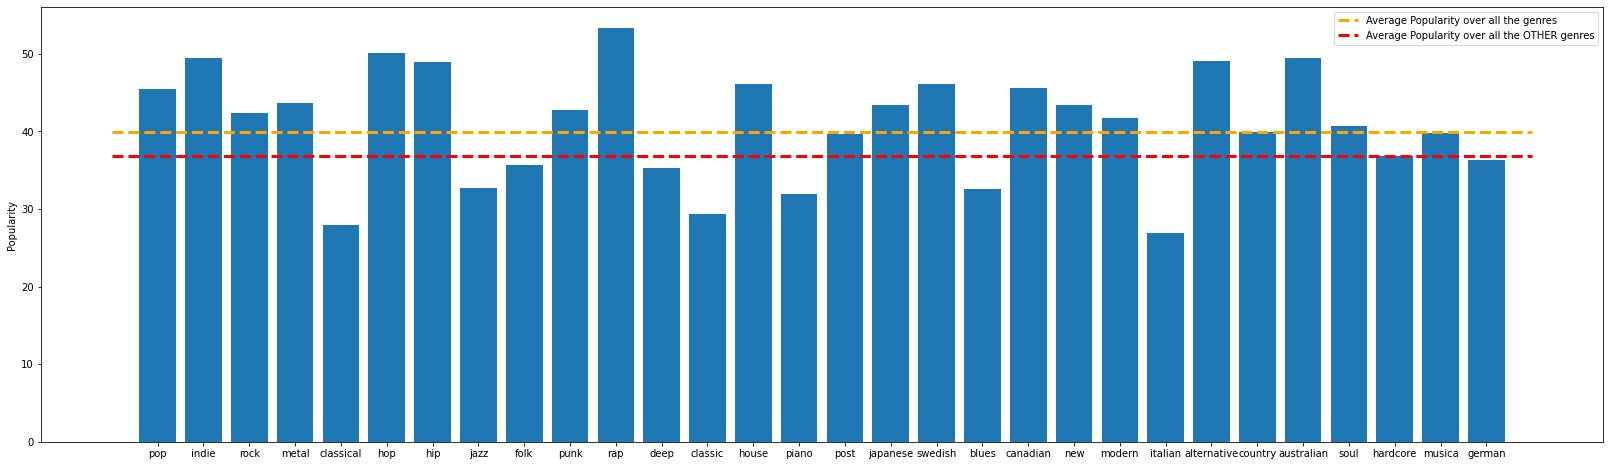

In [ ]:
N=30
means=[]
dff=df.copy()
for i in range(N):
    means.append(df[df['genres'].str.contains(words[i,0])]['popularity'].mean())
    dff.drop(dff[df['genres'].str.contains(words[i,0])].index,inplace=True)


plt.figure(figsize=(28,8))
plt.bar(range(N),means)
plt.plot([-1,N],[df['popularity'].mean(),df['popularity'].mean()],linestyle='--',linewidth=3,color='orange',label='Average Popularity over all the genres')
plt.plot([-1,N],[dff['popularity'].mean(),dff['popularity'].mean()],linestyle='--',linewidth=3,color='red',label='Average Popularity over all the OTHER genres')
plt.xticks(range(N),labels=words[:N,0])
plt.legend(loc='upper right')
plt.ylabel('Popularity')
plt.show()

## Cluster Analysis

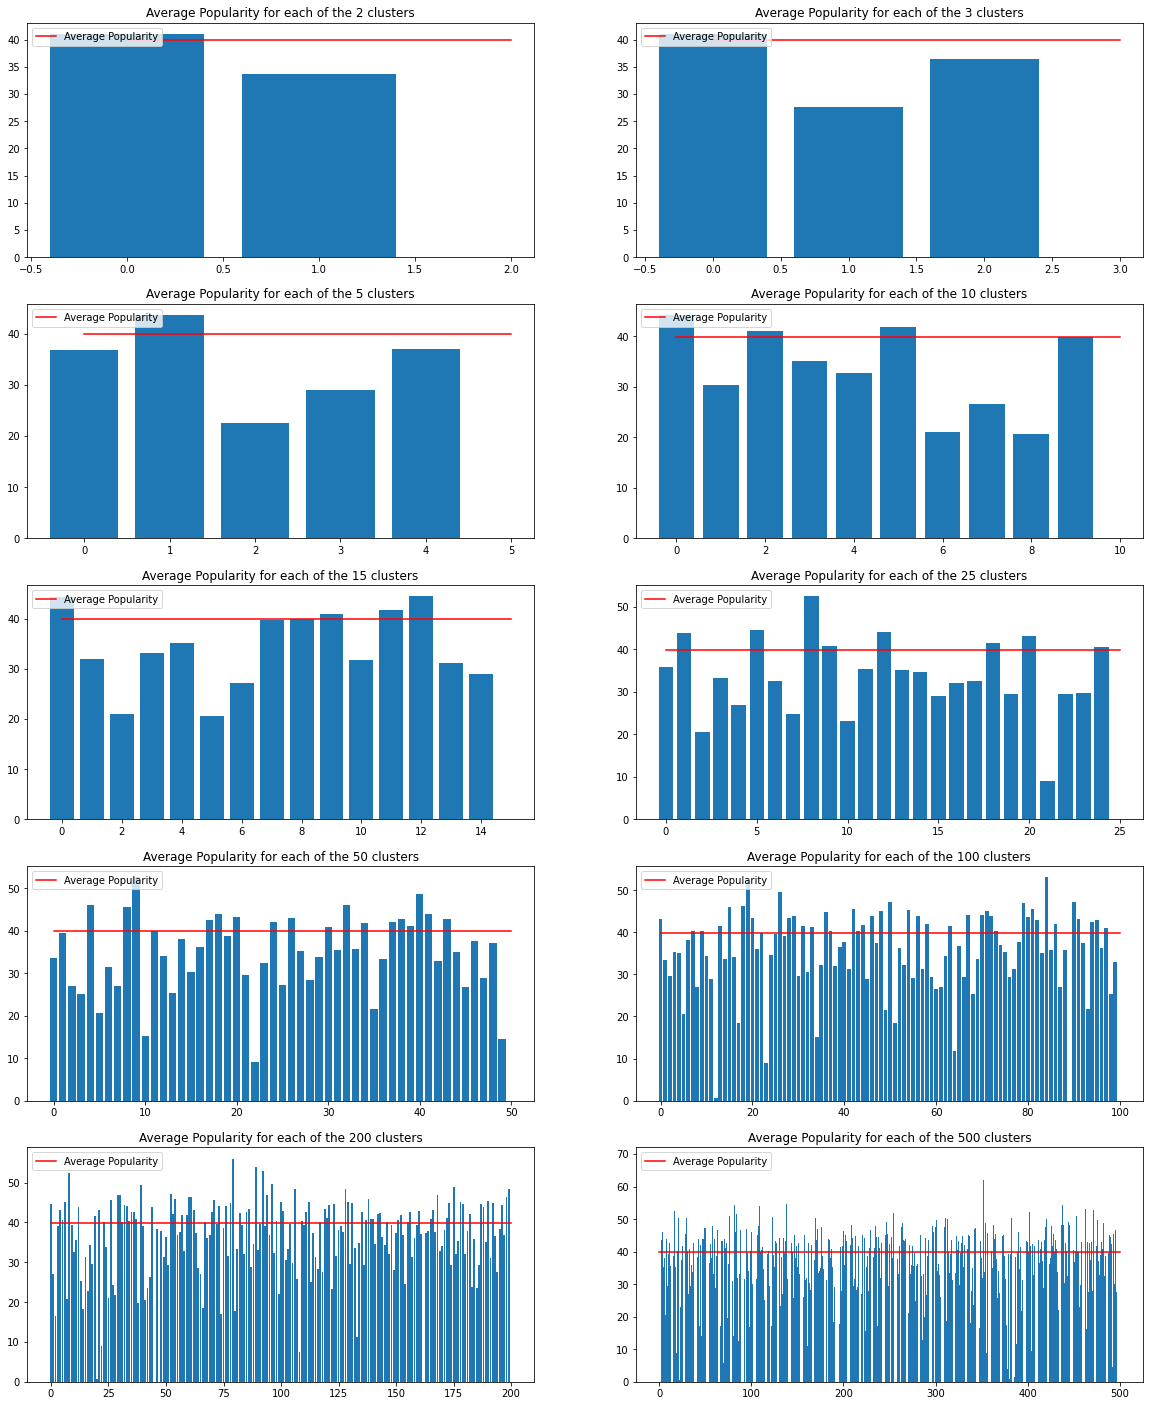

In [ ]:
from sklearn.cluster import KMeans

X=df.drop(['genres','popularity'],axis=1).to_numpy()

n_clus=[2,3,5,10,15,25,50,100,200,500]
avg=df['popularity'].mean()

_,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,25))

for i,ax in enumerate(axs.flatten()):
    plt.sca(ax)
    km=KMeans(n_clusters=n_clus[i])
    classes=km.fit_predict(X)

    dataset_clust=df.copy()
    dataset_clust['genres']=classes

    plt.bar(range(n_clus[i]),[dataset_clust[dataset_clust['genres']==i]['popularity'].mean() for i in range(n_clus[i])])
    plt.plot([0,n_clus[i]],[avg,avg],label='Average Popularity',color='red')
    plt.legend(loc='upper left')
    plt.title('Average Popularity for each of the '+str(n_clus[i])+' clusters')

plt.show()

## KNN with other database

In [ ]:
genres=['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop', 'techhouse', 'techno',
'trance', 'psytrance', 'trap', 'dnb', 'hardstyle']

big_df=pd.read_csv('dataset/Spotify_train_dataset.csv')

dataset_knn=big_df.loc[:,['mode','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','key']]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.classes_=genres
genres_knn=le.transform(big_df['genre'])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(dataset_knn,genres_knn)

X_queries=df.loc[:,['mode','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','key']]
Y_answers=knn.predict(X_queries)

df_knn=df.copy()
df_knn['genres']=Y_answers
df_knn

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,4,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,11,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,8,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,0,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,3,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,0,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,5,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,12,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


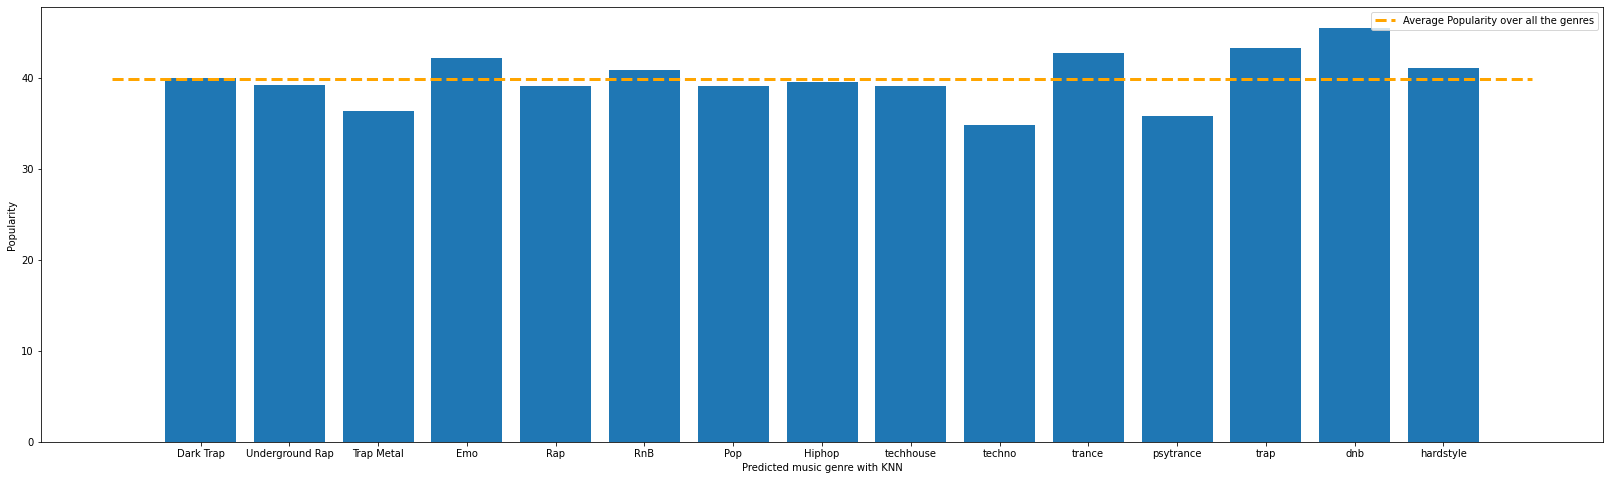

In [ ]:
means=[]
for i in range(15):
    means.append(df_knn[df_knn['genres']==i]['popularity'].mean())

plt.figure(figsize=(28,8))
plt.bar(range(15),means)
plt.plot([-1,15],[df['popularity'].mean(),df['popularity'].mean()],linestyle='--',linewidth=3,color='orange',label='Average Popularity over all the genres')
plt.xticks(range(15),labels=genres)
plt.legend(loc='upper right')
plt.xlabel('Predicted music genre with KNN')
plt.ylabel('Popularity')
plt.show()

# Methods Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

X1=df.drop(['genres','popularity'],axis=1).to_numpy()
Y1=df['popularity'].to_numpy()

X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,random_state=10,test_size=0.2)

print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(2378, 12) (595, 12) (2378,) (595,)


## Without genre

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

rf=RandomForestRegressor(n_estimators=250,random_state=0)
scores1 = cross_validate(rf,X1,Y1,cv=5,scoring={'r2':make_scorer(r2_score),'mae':make_scorer(mean_absolute_error)})


In [ ]:
print(scores1['test_r2'].mean())
print(scores1['test_mae'].mean())
print(np.std(scores1['test_r2']))
print(np.std(scores1['test_mae']))

0.5580820780699937
7.612989267630748
0.03853240946278396
0.46037942995257014


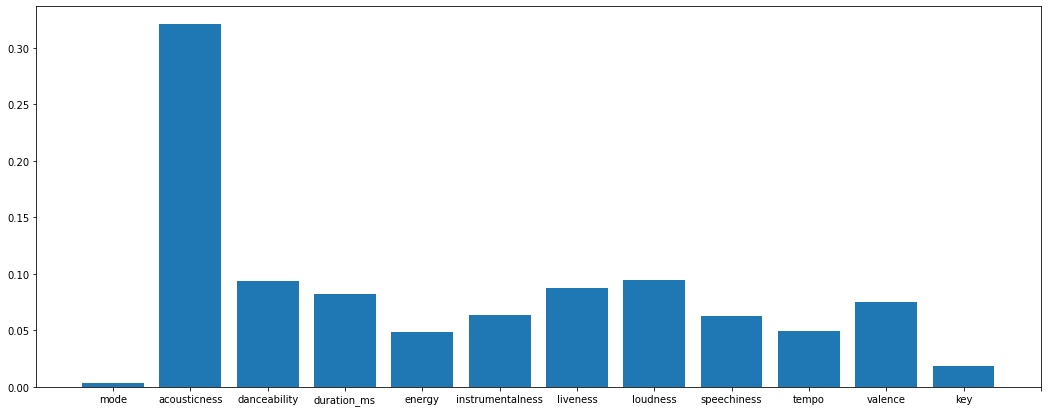

In [ ]:
plt.figure(figsize=(18,7))
plt.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
plt.xticks(range(13),labels=df.drop(['genres','popularity'],axis=1).columns)
plt.show()

## With KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold

mae=[]
r2=[]

for _ in range(5):
    X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2)
    
    km=KMeans(n_clusters=10)
    classes_train=np.expand_dims(km.fit_predict(X1_train),-1)
    classes_test=np.expand_dims(km.predict(X1_test),-1)

    X2_train=np.concatenate((X1_train,classes_train),axis=-1)
    X2_test=np.concatenate((X1_test,classes_test),axis=-1)

    rf=RandomForestRegressor(n_estimators=250,random_state=0)
    rf.fit(X2_train,Y1_train)

    yhat=rf.predict(X2_test)

    mae.append(mean_absolute_error(Y1_test,yhat))
    r2.append(r2_score(Y1_test,yhat))



In [ ]:
print(np.mean(mae))
print(np.mean(r2))

print(np.std(r2))
print(np.std(mae))

7.45933455724324
0.569440027048671
0.027563217831518386
0.2976140706986293


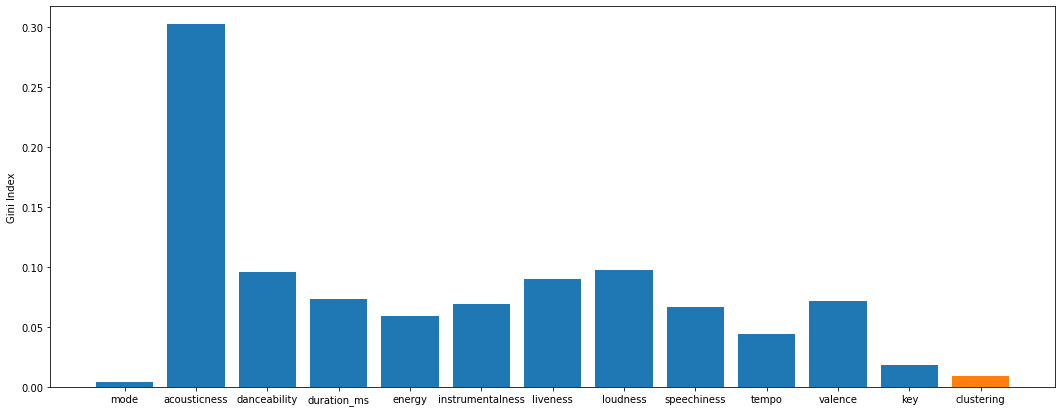

In [ ]:

plt.figure(figsize=(18,7))
plt.bar(range(len(rf.feature_importances_[:-1])),rf.feature_importances_[:-1])
plt.bar([12],rf.feature_importances_[-1])
plt.xticks(range(13),labels=['mode', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key','clustering'])
plt.ylabel('Gini Index')
plt.show()

## With Word Analysis

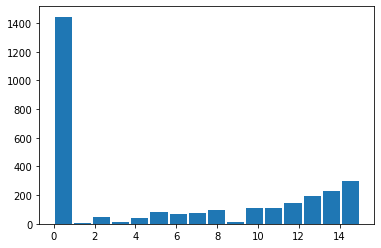

Number of classified musics : 1528/2973


In [ ]:
n=15
selection=np.flip(words[:n,0])

dataset_word=df.copy()

dataset_word['genres']=0

for i,word in enumerate(selection):
    dataset_word.loc[df['genres'].str.contains(word),'genres']=i+1

plt.hist(dataset_word['genres'],bins=n+1,rwidth=0.9)
plt.show()

a=dataset_word[dataset_word['genres']==0]['genres'].count()

print("Number of classified musics : "+str(len(dataset_word)-a)+"/"+str(len(dataset_word)))

In [ ]:
X3=dataset_word.drop(['popularity'],axis=1).to_numpy()
Y1=dataset_word['popularity'].to_numpy()

rf=RandomForestRegressor(n_estimators=250,random_state=0)
scores2 = cross_validate(rf,X3,Y1,cv=5,scoring={'r2':make_scorer(r2_score),'mae':make_scorer(mean_absolute_error)})


In [ ]:
print(scores2['test_r2'].mean())
print(scores2['test_mae'].mean())
print(np.std(scores2['test_r2']))
print(np.std(scores2['test_mae']))

0.5614353579112675
7.608379961519612
0.038699811845774715
0.45149161065079735


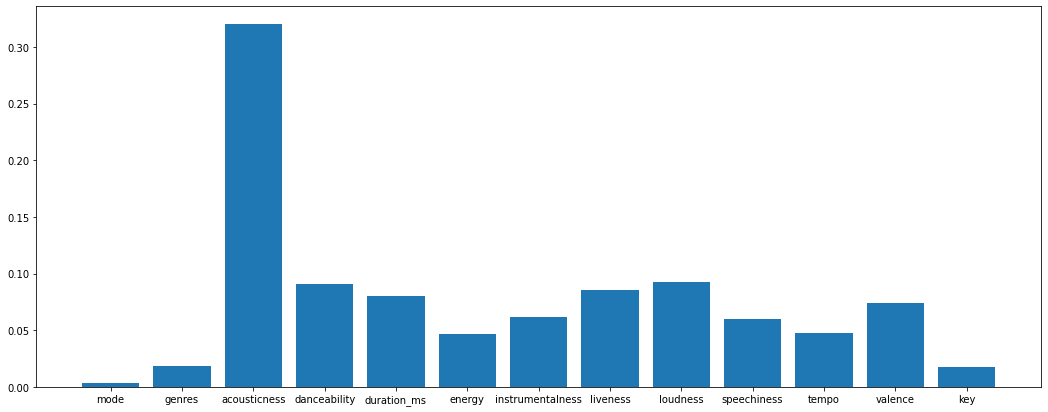

In [ ]:
plt.figure(figsize=(18,7))
plt.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
plt.xticks(range(13),labels=dataset_word.drop(['popularity'],axis=1).columns)
plt.ylabel('Gini Index')
plt.show()

## With KNN from other databse

In [ ]:
X3=df_knn.drop(['popularity'],axis=1).to_numpy()
Y1=df_knn['popularity'].to_numpy()


rf=RandomForestRegressor(n_estimators=250,random_state=0)
scores3 = cross_validate(rf,X3,Y1,cv=5,scoring={'r2':make_scorer(r2_score),'mae':make_scorer(mean_absolute_error)})

In [ ]:
print(scores3['test_r2'].mean())
print(scores3['test_mae'].mean())

print(scores3['test_r2'].std())
print(scores3['test_mae'].std())

0.5578820974211596
7.611102327190662
0.039017610220197195
0.46199640486441085


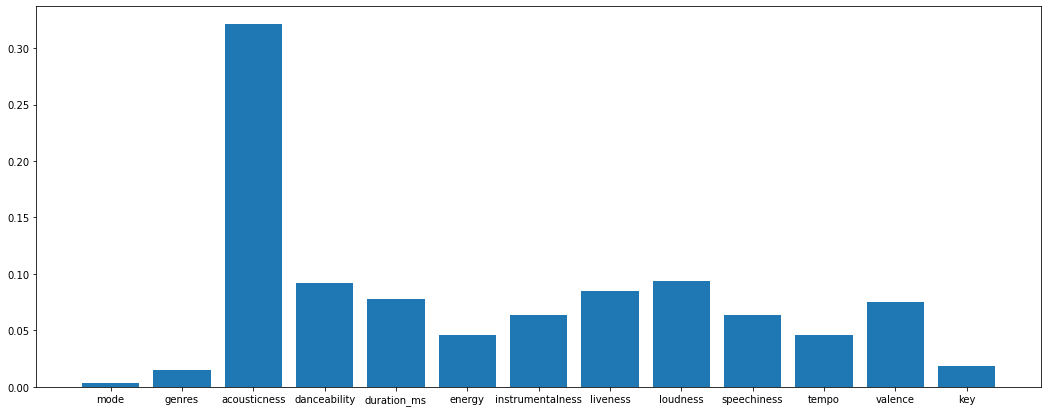

In [ ]:
plt.figure(figsize=(18,7))
plt.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
plt.xticks(range(13),labels=dataset_word.drop(['popularity'],axis=1).columns)
plt.ylabel('Gini Index')
plt.show()